## Day 5

https://adventofcode.com/2022/day/5

In [1]:
def parse05(filename):
    with open(filename) as f:
        data = f.read().split("\n\n")
        # parse grid
        grid = data[0].split("\n")
        # get position of letters in columns from bottom row
        pos = [ j for j,c in enumerate(grid[-1]) if c!=" " ]
        # fill lists from columns if letter is available
        columns = [[] for _ in range(len(pos))]
        for l in grid[-2::-1]:
            j = 0
            for p in pos:
                if l[p]!=" ":
                    columns[j].append(l[p])
                j+=1
        # parse instructions
        instr = []
        for l in data[1].strip().split("\n"):
            i = l.split(" ")
            instr.append([int(i[1]),int(i[3]),int(i[5])])
        return columns,instr

In [2]:
def part1(cols,instr):
    for h,i,o in instr:
        for _ in range(h):
            cols[o-1].append(cols[i-1].pop())
    return "".join(c[-1] for c in cols)

def part2(cols,instr):
    for h,i,o in instr:
        stack = cols[i-1][-h:]
        cols[i-1] = cols[i-1][:-h]
        cols[o-1] += stack
    return "".join(c[-1] for c in cols)

In [3]:
cols0,instr0 = parse05("data/test05.txt")
cols ,instr  = parse05("data/input05.txt")
print(part1(cols0,instr0))
print(part1(cols,instr))

CMZ
BZLVHBWQF


In [4]:
cols0,instr0 = parse05("data/test05.txt")
cols ,instr  = parse05("data/input05.txt")
print(part2(cols0,instr0))
print(part2(cols,instr))

MCD
TDGJQTZSL


### Animation

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def fillMatrix(cols,xmax=3,ymax=10):
    c = np.zeros((ymax,xmax))
    for (j,l) in enumerate(cols):
        for (i,v) in enumerate(l):
            c[ymax-1-i][j] = ord(v)
    return c

from itertools import chain
from celluloid import Camera

def part1animation(cols,instr,ymax=0):
    xmax = len(cols)
    if not ymax:
        ymax = len(list(chain(*cols)))
    f = plt.figure(figsize=(xmax//4,ymax//4),dpi=90)
    camera = Camera(f)
    c = fillMatrix(cols,xmax,ymax)
    plt.imshow(c)
    plt.axis('off')
    camera.snap()
    #plt.show()
    for h,i,o in instr:
        for _ in range(h):
            cols[o-1].append(cols[i-1].pop())
        c = fillMatrix(cols,xmax,ymax)
        plt.imshow(c)
        plt.axis('off')
        camera.snap()  
        #plt.show()
    return "".join(c[-1] for c in cols), camera

Generating animation... Done. 


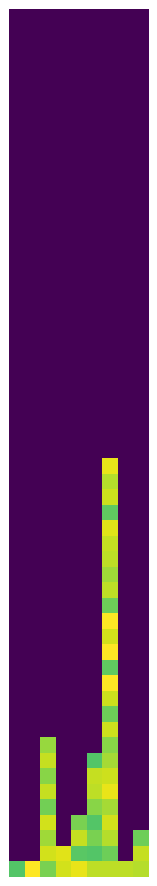

In [17]:
cols,instr = parse05("data/input05.txt")

print("Generating animation... ",end="")
_, camera = part1animation(cols,instr,0)
print("Done. ")

In [18]:
print("Saving animation... ",end="")
anim = camera.animate(blit=True)
anim.save('visualisation/day5animation1.gif', writer='imagemagick')
print("Animation saved.")

Saving animation... Animation saved.


![Crates](./visualisation/day5animation1.gif)